In [411]:
import pandas as pd
from matplotlib import pyplot as plt

In [412]:
sim = pd.read_csv("run.csv")
sim[sim.columns] = sim[sim.columns].astype(str)
sim.tail()

,Ag0,Ag1,Ag2,Ag3,Ag4,Ag5,Ag6,Ag7,Ag8,Ag9,...,Ag990,Ag991,Ag992,Ag993,Ag994,Ag995,Ag996,Ag997,Ag998,Ag999
161,R,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,R,R
162,R,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,R,R
163,R,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,R,R
164,R,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,R,R
165,R,S,S,S,S,S,S,S,S,S,...,S,S,S,S,S,S,S,S,R,R


In [413]:
N = len(sim.columns)
N

1000

In [414]:
count_S = 0
count_I = 0
count_R = 0
S = []
I = []
R = []
for row in sim.iloc:
    for ag in row:
        ag = ag.strip()
        if ag == "S":
            count_S += 1
        elif ag == "I":
            count_I += 1
        elif ag == "R":
            count_R += 1
    S.append(count_S/N)
    I.append(count_I/N)
    R.append(count_R/N)
    if (count_S + count_I + count_R)/N < 1:
        print("Bug")
    count_S = 0
    count_I = 0
    count_R = 0

In [415]:
sim_c = pd.DataFrame({"S":S, "I":I, "R":R})
sim_c.tail()

,S,I,R
161,0.883,0.003,0.114
162,0.883,0.002,0.115
163,0.883,0.001,0.116
164,0.883,0.001,0.116
165,0.883,0.000,0.117


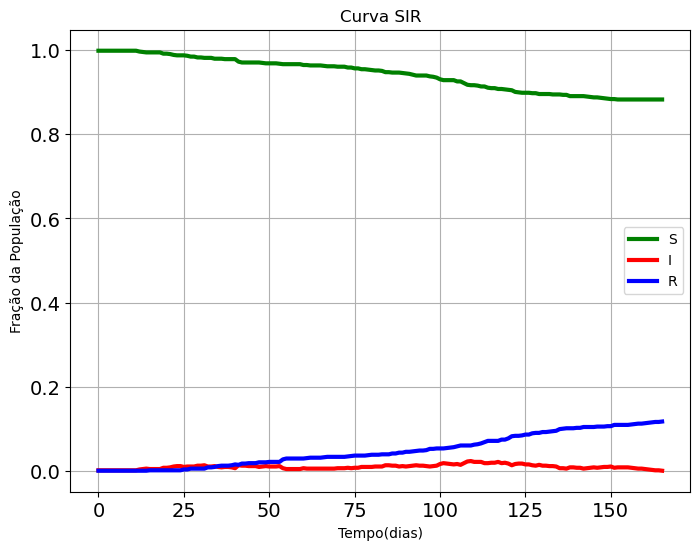

In [416]:

fig = sim_c.plot(kind='line', figsize=(8, 6), title="Curva SIR", grid=True, legend=True, 
                 xlabel="Tempo(dias)", ylabel="Fração da População", color=['g', 'r', 'b'],
                 fontsize=14, lw=3).get_figure()

In [417]:
fig.savefig('run.png')